# Testing decision tree decision path to compute infimum under $\nu$

In [15]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn import tree
import matplotlib.pyplot as plt

In [16]:
# Simulate data using sklearn function
X_train, y_train = make_regression(n_samples=50, n_features=3, random_state=42)

# Create a decision tree regressor object
regressor = DecisionTreeRegressor(max_leaf_nodes=5, random_state=0)

# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Predict the target variable for the test data
X_test = np.array([[2, 3, 4], [5, 6, 7]])
y_pred = regressor.predict(X_test)

x[0] is our parameter os interest and x[1] and x[2] are nuissance:

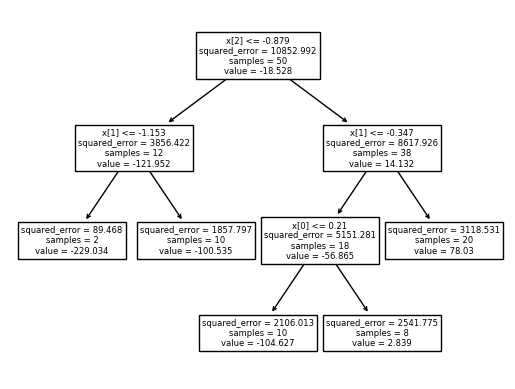

In [17]:
tree.plot_tree(regressor)
plt.show()

Exploring tree structure:

In [20]:
n_nodes = regressor.tree_.node_count
children_left = regressor.tree_.children_left
children_right = regressor.tree_.children_right
feature = regressor.tree_.feature
threshold = regressor.tree_.threshold
values = regressor.tree_.value

In [26]:
children_left

array([ 1,  7,  3,  5, -1, -1, -1, -1, -1], dtype=int64)

In [27]:
children_right

array([ 2,  8,  4,  6, -1, -1, -1, -1, -1], dtype=int64)

In [28]:
feature

array([ 2,  1,  1,  0, -2, -2, -2, -2, -2], dtype=int64)

In [21]:
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)

while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

In [29]:
regressor.apply(X_test)

array([4, 4])

Exploring tree in each level:

In [25]:
print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node with value={value}.".format(
                space=node_depth[i] * "\t", node=i, value=values[i]
            )
        )
    else:
        print(
            "{space}node={node} is a split node with value={value}: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
                value=values[i],
            )
        )

The binary tree structure has 9 nodes and has the following tree structure:

node=0 is a split node with value=[[-18.52785519]]: go to node 1 if X[:, 2] <= -0.87932088971138 else to node 2.
	node=1 is a split node with value=[[-121.95151352]]: go to node 7 if X[:, 1] <= -1.152694195508957 else to node 8.
	node=2 is a split node with value=[[14.13224745]]: go to node 3 if X[:, 1] <= -0.3473960682749748 else to node 4.
		node=3 is a split node with value=[[-56.86472587]]: go to node 5 if X[:, 0] <= 0.2102559469640255 else to node 6.
		node=4 is a leaf node with value=[[78.02952343]].
			node=5 is a leaf node with value=[[-104.62743522]].
			node=6 is a leaf node with value=[[2.83866081]].
		node=7 is a leaf node with value=[[-229.03435438]].
		node=8 is a leaf node with value=[[-100.53494535]].


Exploring first the left part:

In [ ]:
print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node with value={value}.".format(
                space=node_depth[i] * "\t", node=i, value=values[i]
            )
        )
    else:
        print(
            "{space}node={node} is a split node with value={value}: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
                value=values[i],
            )
        )

In [ ]:
for i in range(n_nodes):
    if is_leaves[i]:
        print("reached a leaf")
    else:
        